# Results for epochs selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.read_csv('results_epochs_selection/Malanville/CO2_detailed_output.csv')

,timestamp,project_name,run_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2024-08-12T02:02:34,Linear Regression,f13d90a3-d5b6-4ef9-b4fe-2b17e3b7e12d,1.170513,0.000005,0.000005,22.5,0.0,11.695504,0.000007,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
1,2024-08-12T02:02:39,Ridge,0c5f8abb-ab6d-4634-8f36-98d055e3cbd2,0.899055,0.000004,0.000005,22.5,0.0,11.695504,0.000006,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
2,2024-08-12T02:02:49,RandomForest,eac24e13-e88f-4185-bd11-cccdfbd99900,5.242789,0.000024,0.000005,22.5,0.0,11.695504,0.000033,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
3,2024-08-12T02:02:56,Xgboost,9d05d6c7-d41d-4229-934d-f4832d30b472,3.000684,0.000014,0.000005,22.5,0.0,11.695504,0.000019,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
4,2024-08-12T02:03:02,Lightgbm,cbfbcf8b-a332-4468-a6ec-1d8eb6403e63,1.915042,0.000009,0.000005,22.5,0.0,11.695504,0.000012,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
5,2024-08-12T02:03:08,SVR,4656d590-8ba4-4440-b7fc-831ed124ef5e,1.570817,0.000007,0.000005,22.5,0.0,11.695504,0.000010,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
6,2024-08-12T02:20:52,Conv1D-model,ece7360f-f162-414f-b892-8e19f52abbc7,1059.207536,0.004779,0.000005,22.5,0.0,11.695504,0.006620,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
7,2024-08-12T02:51:14,LSTM-model,bb214db7-cebb-49bf-9be5-3b9873830127,1817.513303,0.008200,0.000005,22.5,0.0,11.695504,0.011359,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
8,2024-08-12T03:12:57,GRU-model,8476ad8c-fbe7-493a-bc89-de00c9127bce,1298.815870,0.005860,0.000005,22.5,0.0,11.695504,0.008117,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0
9,2024-08-12T03:33:41,Conv1d-LSTM,3fcd3781-4ea5-4f5f-8250-d0d519234972,1238.752250,0.005589,0.000005,22.5,0.0,11.695504,0.007742,...,8,Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz,NaN,NaN,-7.6133,33.5792,31.188011,machine,N,1.0


In [3]:
sns.set_theme(style="white", context="talk", palette="muted")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 13,         
    'axes.titlesize': 13,
    'axes.labelsize': 13,    
    'legend.fontsize': 11,   
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 100
})

In [4]:
def plot_loss(history, size=(9, 6), train_label='Training loss', val_label='Validation loss', title='Training Validation loss'):
    plt.figure(figsize=size)
    plt.plot(history['loss'], '-', linewidth=2, label=train_label)
    plt.plot(history['val_loss'], '-', linewidth=2, label=val_label)
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    #plt.show()

In [5]:
def plot_metric(history, size=(9, 6), train_label='Training root mean squared error', val_label='Validation root mean squared error', title='Root mean squared error'):
    plt.figure(figsize=size)
    plt.plot(history['root_mean_squared_error'], '-', linewidth=2, label=train_label)
    plt.plot(history['val_root_mean_squared_error'], '-', linewidth=2, label=val_label)
    plt.title(title)
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    #plt.show()

In [6]:
EPOCHS = 500

## Malanville

### conv1D

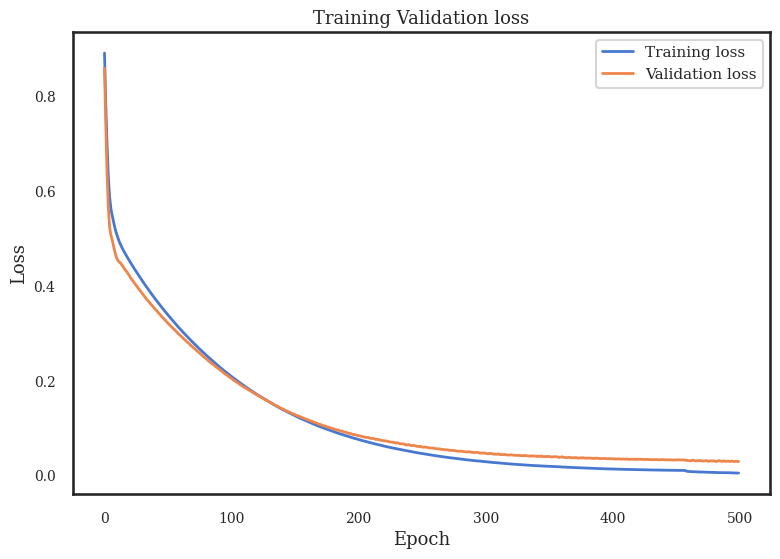

In [28]:
model_outputs = pd.read_csv('results_epochs_selection/Malanville/conv1D_train_output.csv')
plot_loss(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'conv1D_train_val_loss.png'))
plt.show() 

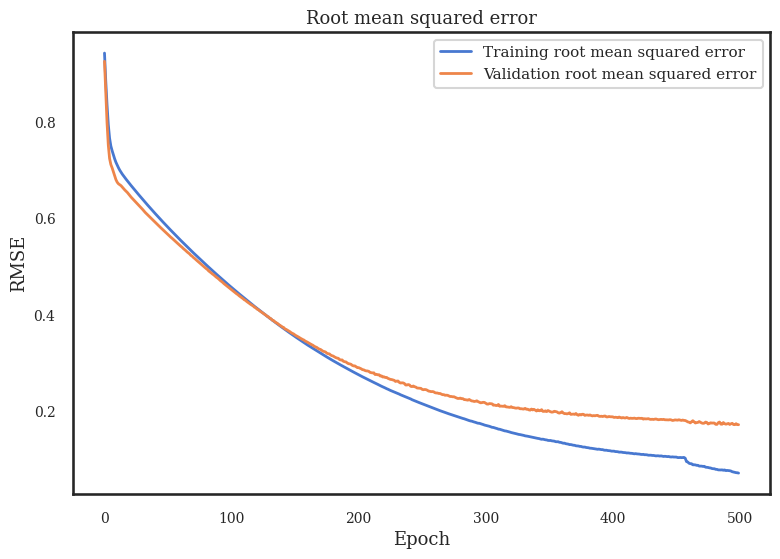

In [30]:
plot_metric(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'conv1D_train_val_rmse.png'))
plt.show() 

In [31]:
# 200 epochs to be taken into consideration

### LSTM

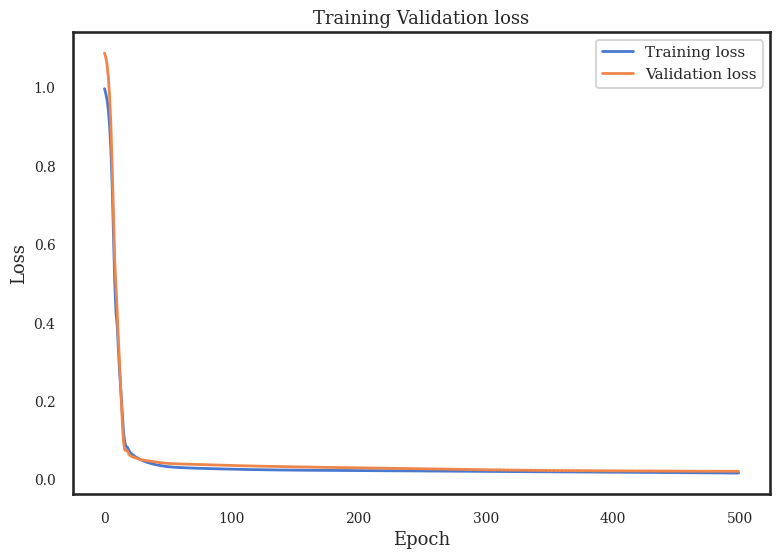

In [33]:
lstm_model_outputs = pd.read_csv('results_epochs_selection/Malanville/LSTM_train_output.csv')
plot_loss(lstm_model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'LSTM_train_val_loss.png'))
plt.show() 

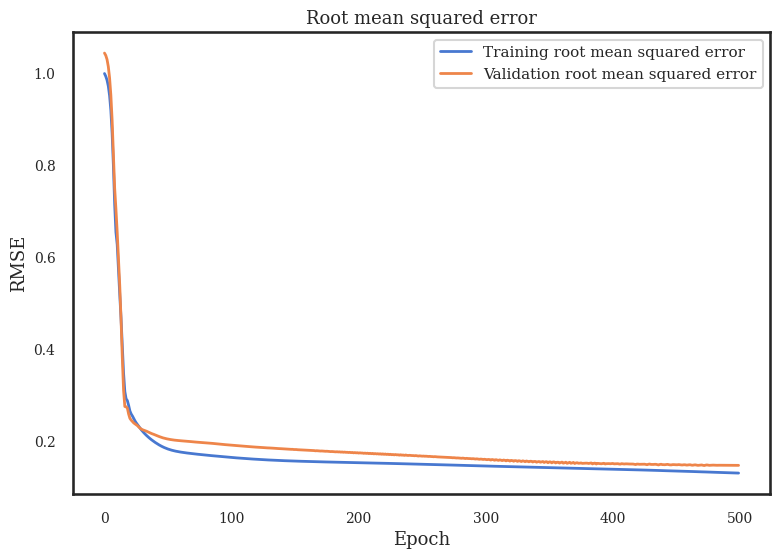

In [34]:
plot_metric(lstm_model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'LSTM_train_val_rmse.png'))
plt.show() 

In [35]:
# 350 epochs to be taken into consideration

### GRU

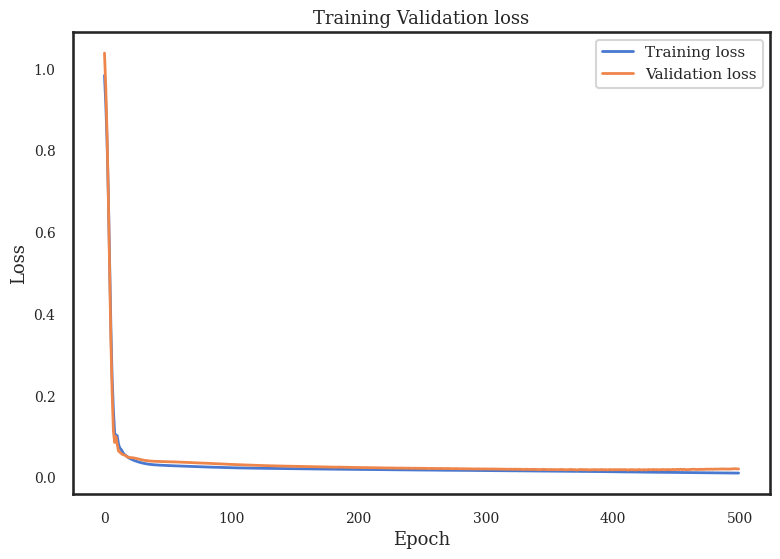

In [36]:
model_outputs = pd.read_csv('results_epochs_selection/Malanville/GRU_train_output.csv')
plot_loss(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'GRU_train_val_loss.png'))
plt.show() 

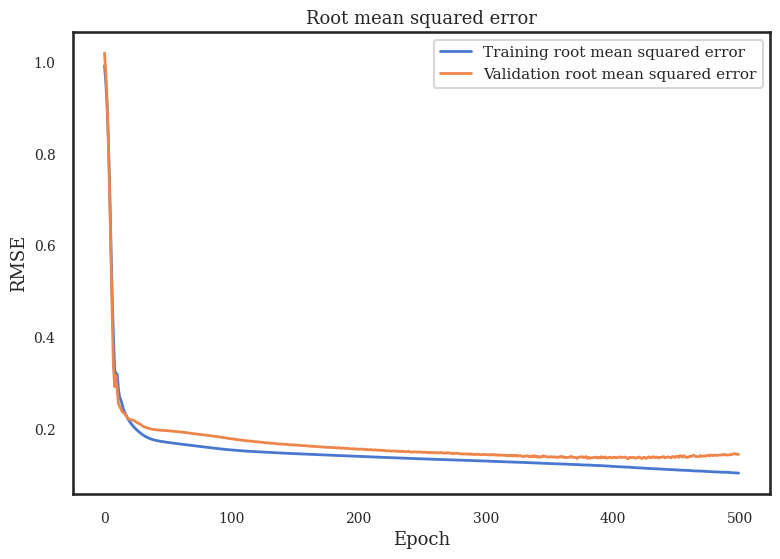

In [37]:
plot_metric(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'GRU_train_val_rmse.png'))
plt.show() 

In [38]:
# 350 epochs to be taken into consideration

### conv1D-LSTM

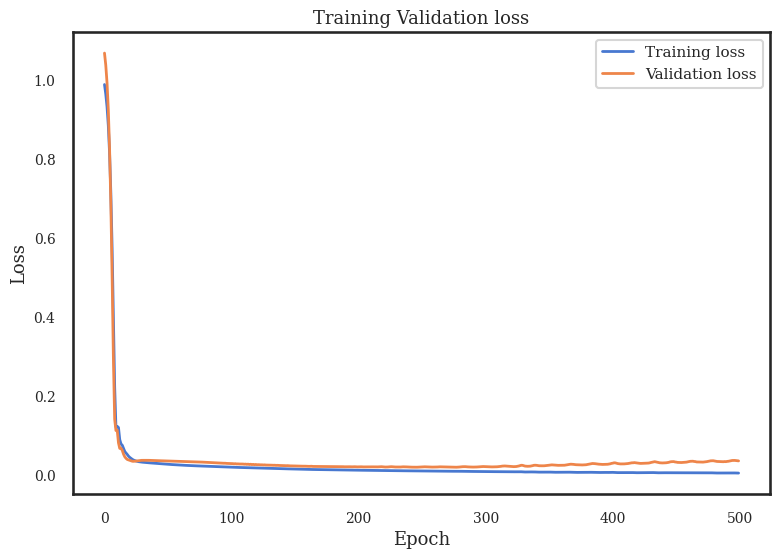

In [39]:
model_outputs = pd.read_csv('results_epochs_selection/Malanville/conv1D_lstm_train_output.csv')
plot_loss(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'conv1D_LSTM_train_val_loss.png'))
plt.show() 

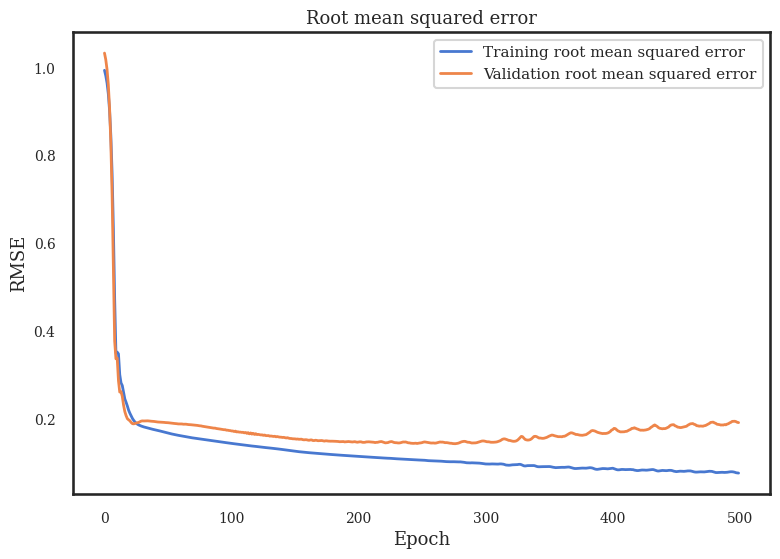

In [40]:
plot_metric(model_outputs[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Malanville/', 'conv1D_LSTM_train_val_rmse.png'))
plt.show() 

In [41]:
# 200 epochs to be taken into consideration

## Karimama

### conv1D

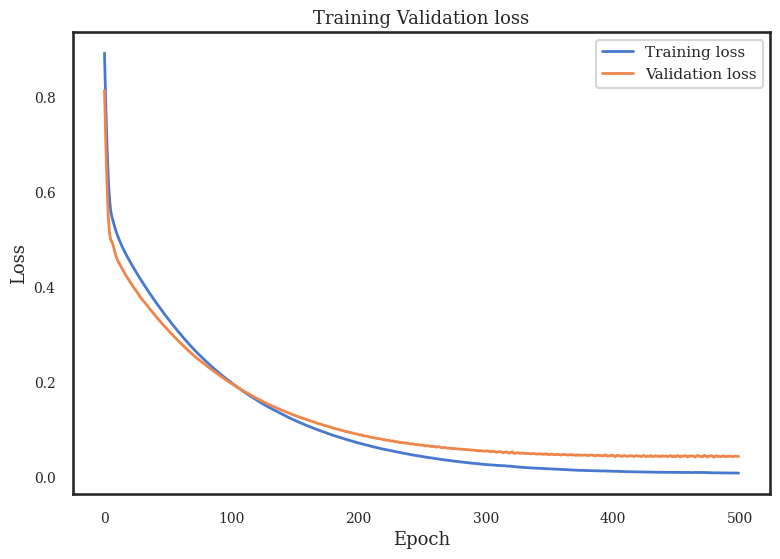

In [42]:
plot_loss(pd.read_csv('results_epochs_selection/Karimama/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'conv1D_train_val_loss.png'))
plt.show() 

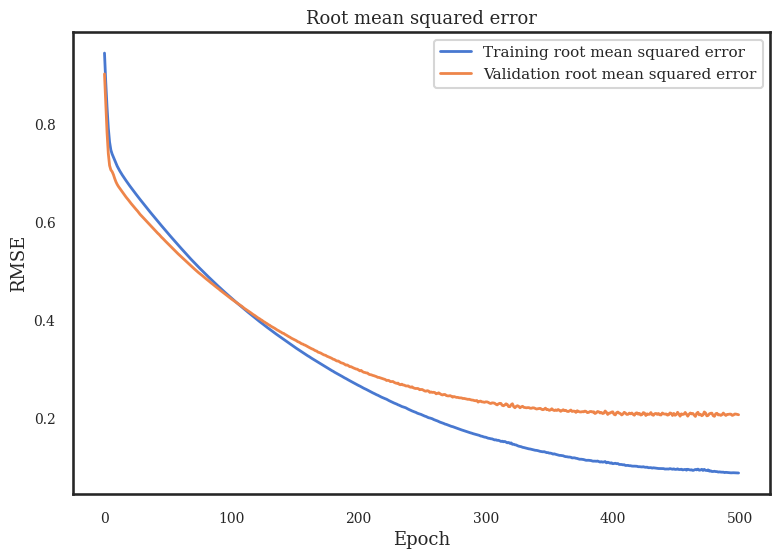

In [43]:
plot_metric(pd.read_csv('results_epochs_selection/Karimama/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'conv1D_train_val_rmse.png'))
plt.show() 

In [44]:
# 150 epochs to be taken into consideration

### LSTM

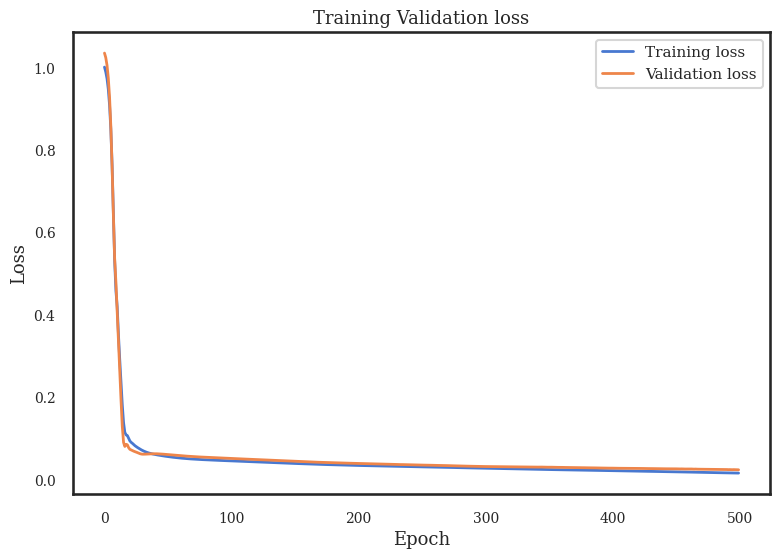

In [45]:
plot_loss(pd.read_csv('results_epochs_selection/Karimama/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'LSTM_train_val_loss.png'))
plt.show() 

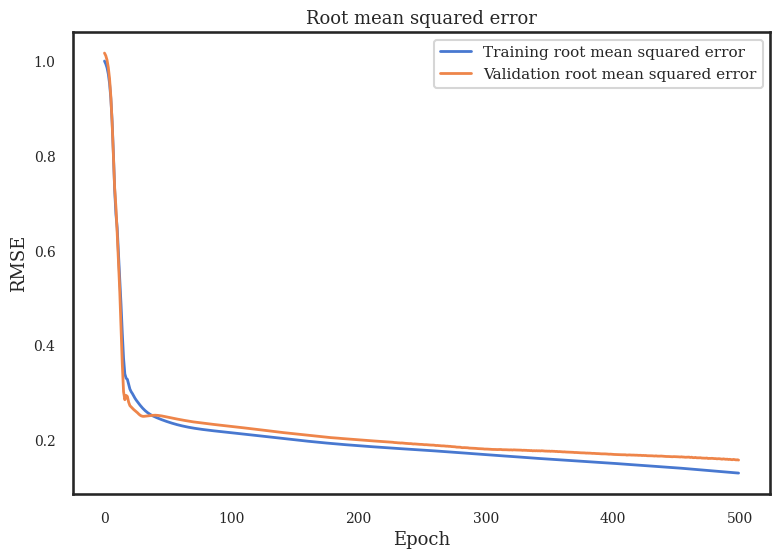

In [46]:
plot_metric(pd.read_csv('results_epochs_selection/Karimama/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'LSTM_train_val_rmse.png'))
plt.show() 

In [47]:
# 350 epochs to be taken into consideration

### GRU

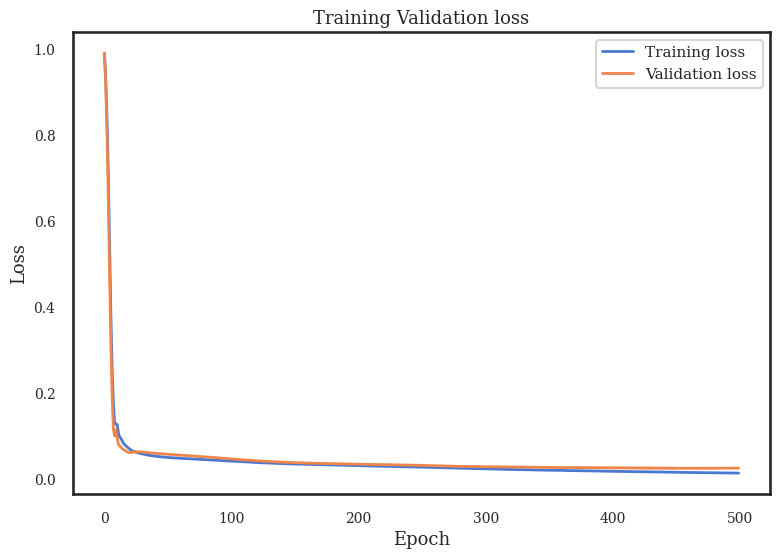

In [48]:
plot_loss(pd.read_csv('results_epochs_selection/Karimama/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'GRU_train_val_loss.png'))
plt.show() 

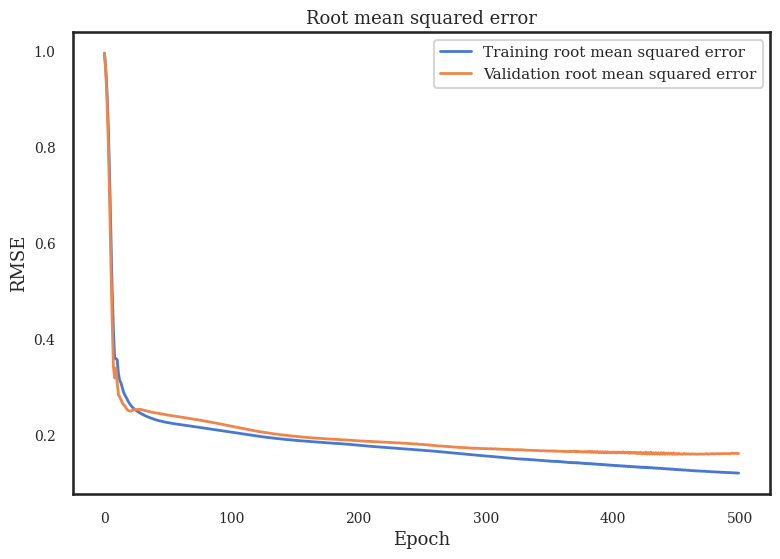

In [49]:
plot_metric(pd.read_csv('results_epochs_selection/Karimama/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'GRU_train_val_rmse.png'))
plt.show() 

In [50]:
# 300 epochs to be taken into consideration

### conv1D-LSTM

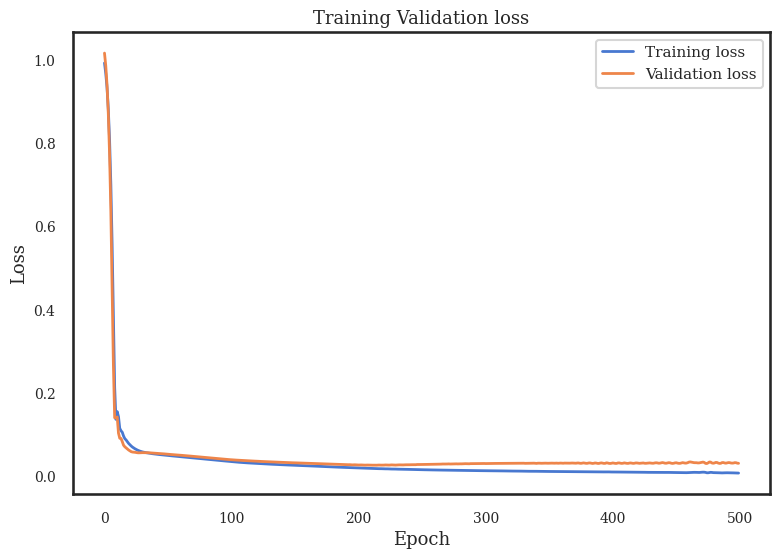

In [51]:
plot_loss(pd.read_csv('results_epochs_selection/Karimama/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'conv1D_LSTM_train_val_loss.png'))
plt.show() 

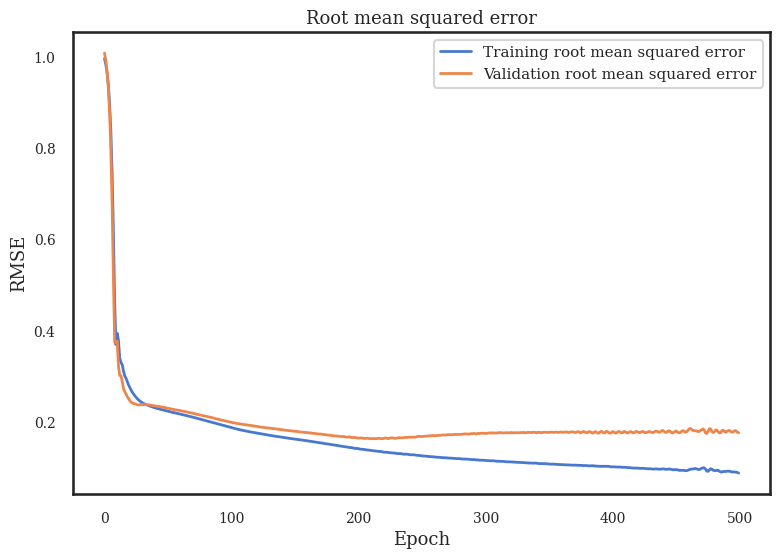

In [52]:
plot_metric(pd.read_csv('results_epochs_selection/Karimama/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Karimama/', 'conv1D_LSTM_train_val_rmse.png'))
plt.show() 

In [53]:
# 200 epochs to be taken into consideration

## Kandi

### conv1D

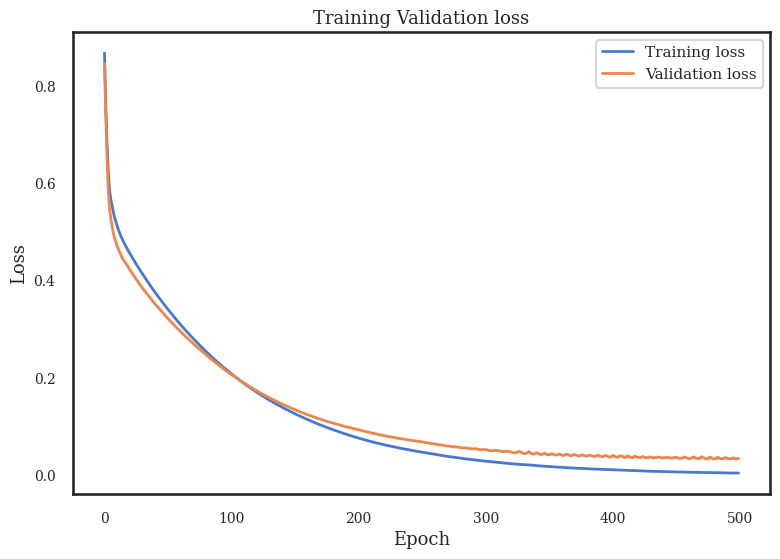

In [54]:
plot_loss(pd.read_csv('results_epochs_selection/Kandi/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'conv1D_train_val_loss.png'))
plt.show() 

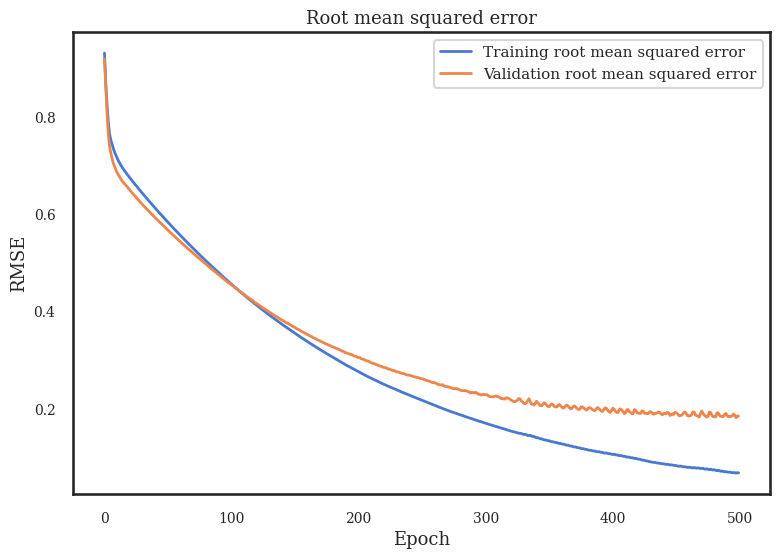

In [55]:
plot_metric(pd.read_csv('results_epochs_selection/Kandi/conv1D_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'conv1D_train_val_rmse.png'))
plt.show() 

In [56]:
# 150 epochs to be taken into consideration

### LSTM

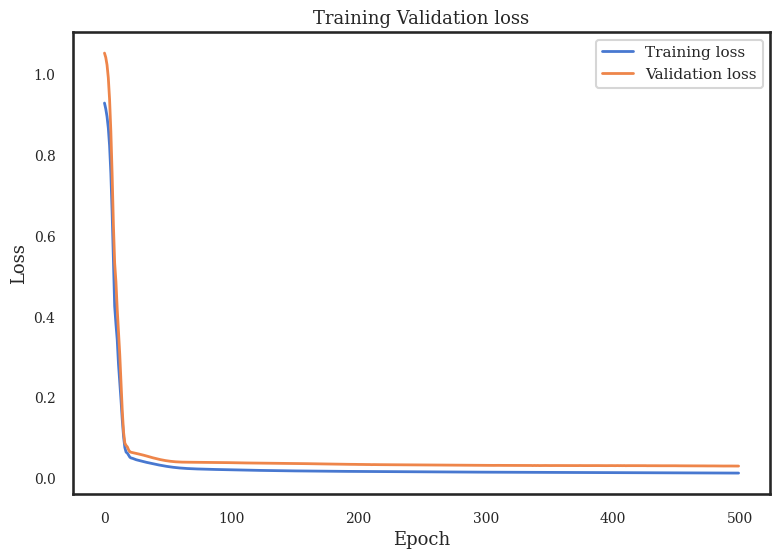

In [57]:
plot_loss(pd.read_csv('results_epochs_selection/Kandi/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'LSTM_train_val_loss.png'))
plt.show()

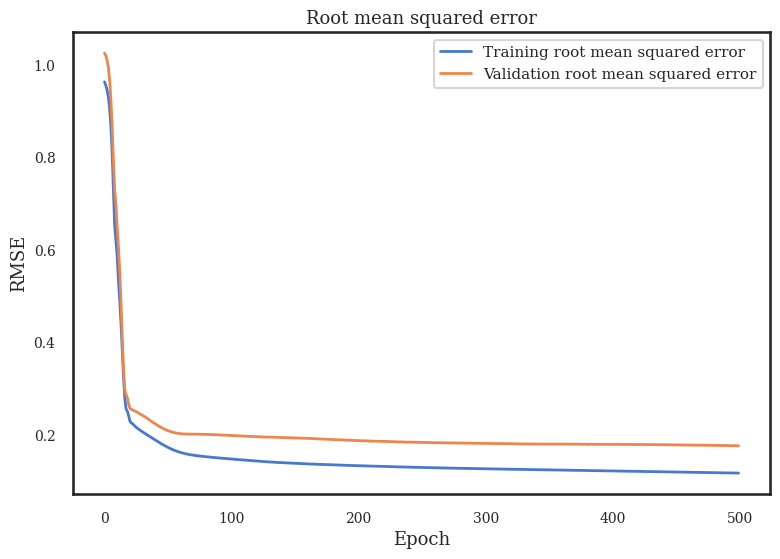

In [58]:
plot_metric(pd.read_csv('results_epochs_selection/Kandi/LSTM_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'LSTM_train_val_rmse.png'))
plt.show() 

In [59]:
# 150 epochs to be taken into consideration

### GRU

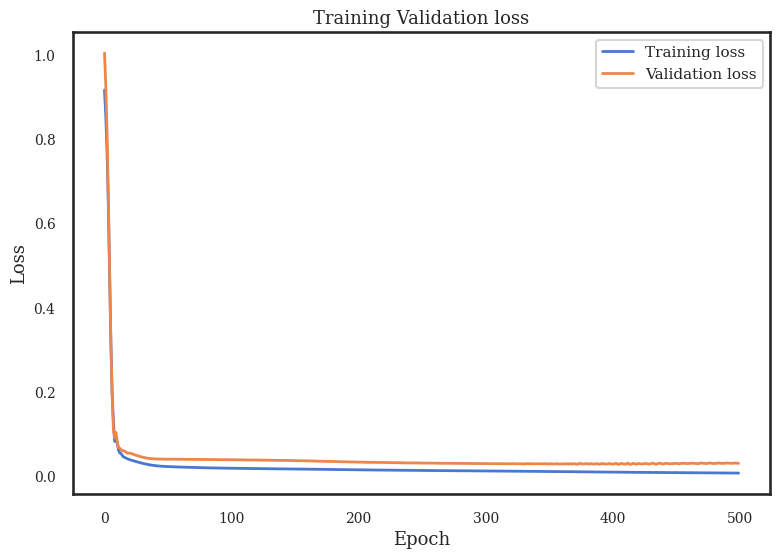

In [60]:
plot_loss(pd.read_csv('results_epochs_selection/Kandi/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'GRU_train_val_loss.png'))
plt.show() 

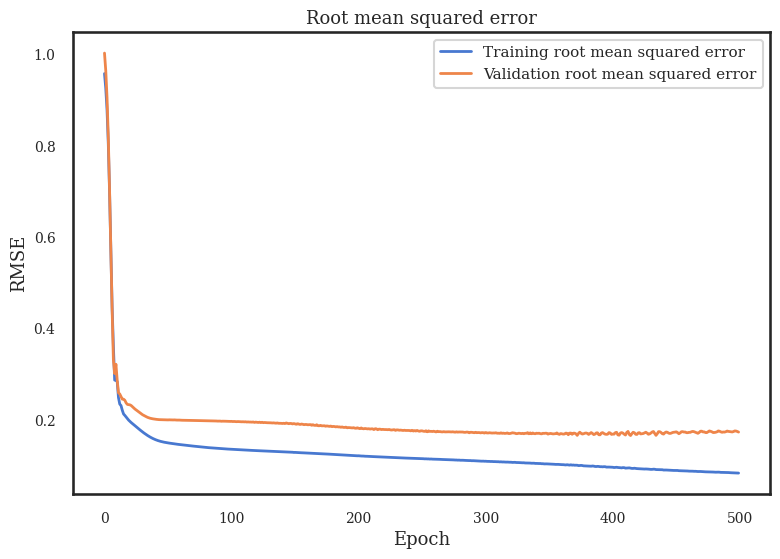

In [61]:
plot_metric(pd.read_csv('results_epochs_selection/Kandi/GRU_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'GRU_train_val_rmse.png'))
plt.show() 

In [62]:
# 150 epochs to be taken into consideration

### conv1D-LSTM

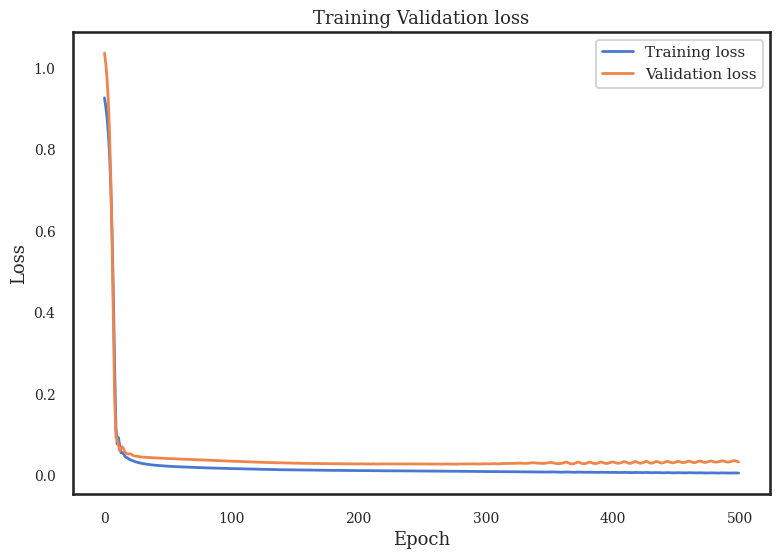

In [63]:
plot_loss(pd.read_csv('results_epochs_selection/Kandi/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'conv1D_LSTM_train_val_loss.png'))
plt.show() 

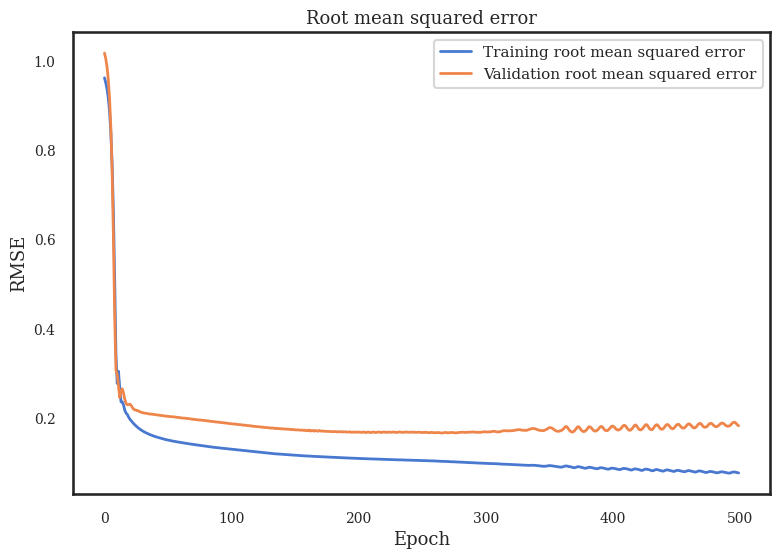

In [64]:
plot_metric(pd.read_csv('results_epochs_selection/Kandi/conv1D_lstm_train_output.csv')[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Kandi/', 'conv1D_LSTM_train_val_rmse.png'))
plt.show() 

In [65]:
# 150 epochs to be taken into consideration

## Gogounou

### conv1D

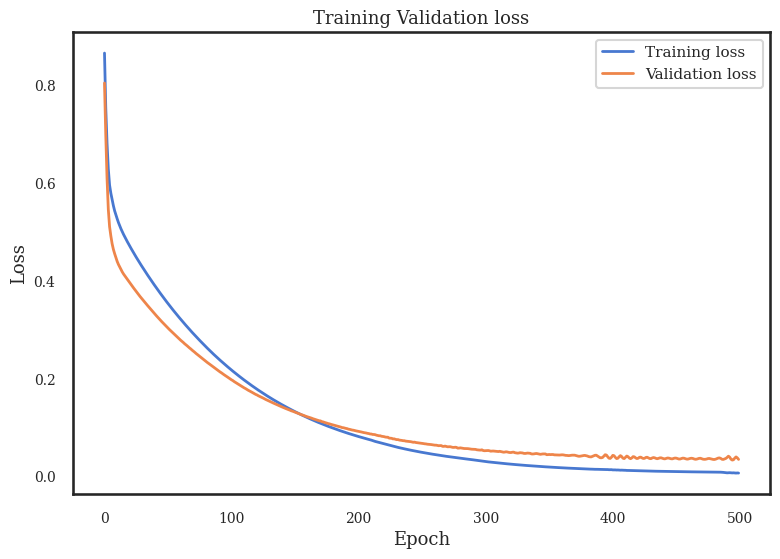

In [66]:
data = pd.read_csv('results_epochs_selection/Gogounou/conv1D_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'conv1D_train_val_loss.png'))
plt.show() 

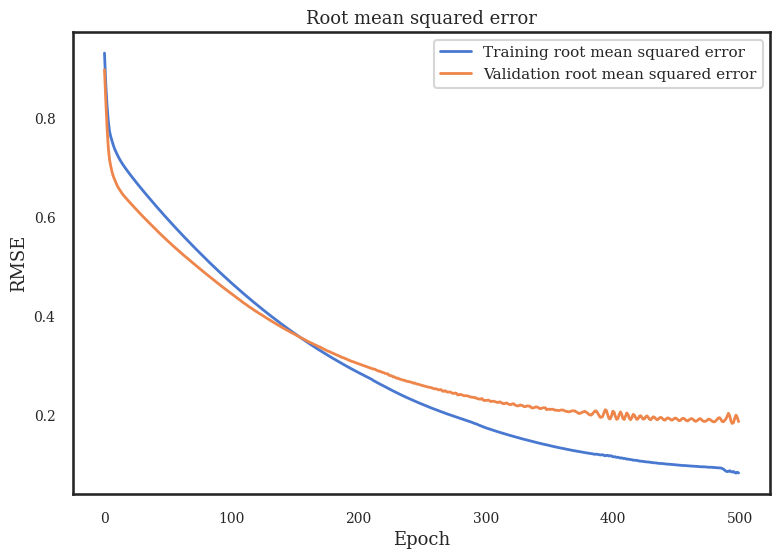

In [67]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'conv1D_train_val_rmse.png'))
plt.show() 

In [68]:
# 200 epochs to be taken into consideration

### LSTM

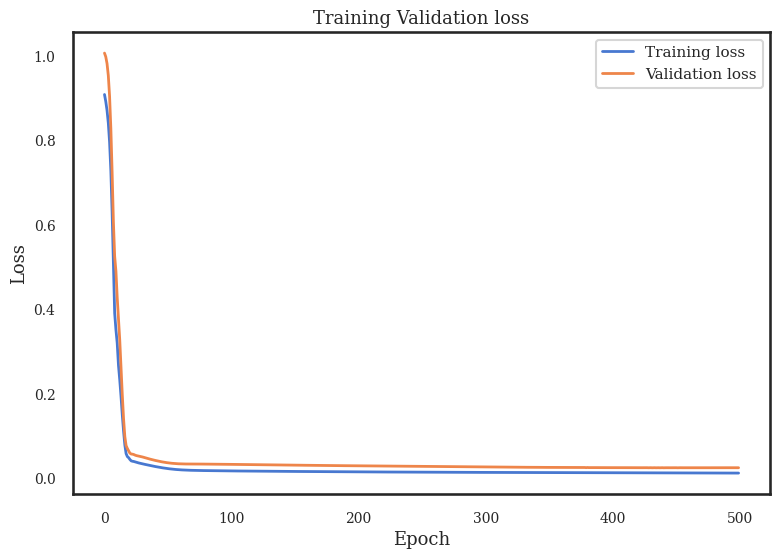

In [69]:
data = pd.read_csv('results_epochs_selection/Gogounou/LSTM_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'LSTM_train_val_loss.png'))
plt.show() 

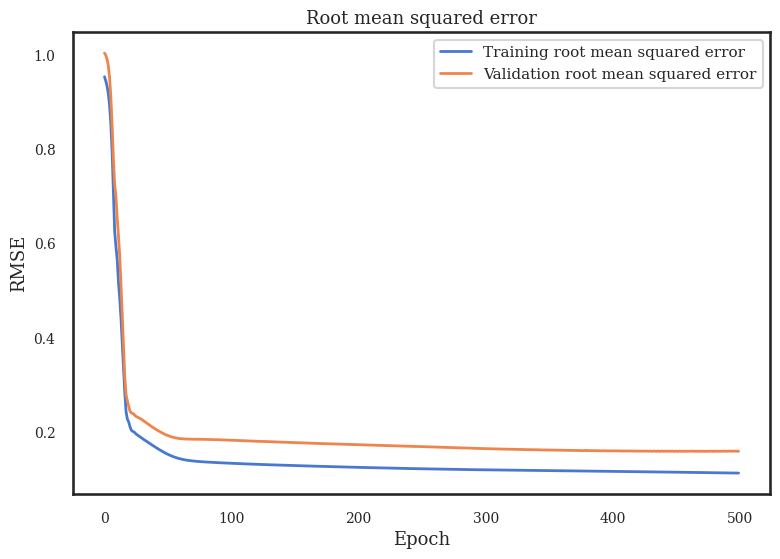

In [70]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'LSTM_train_val_rmse.png'))
plt.show() 

In [71]:
# 200 epochs to be taken into consideration

### GRU

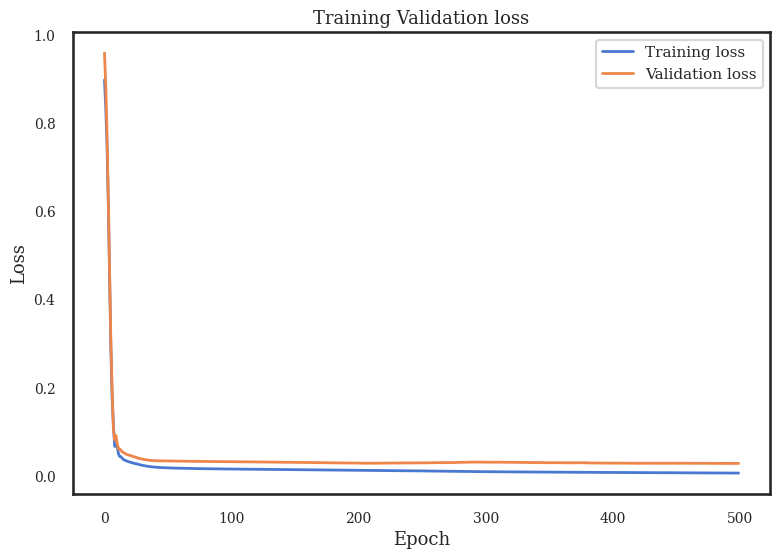

In [72]:
data = pd.read_csv('results_epochs_selection/Gogounou/GRU_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'GRU_train_val_loss.png'))
plt.show() 

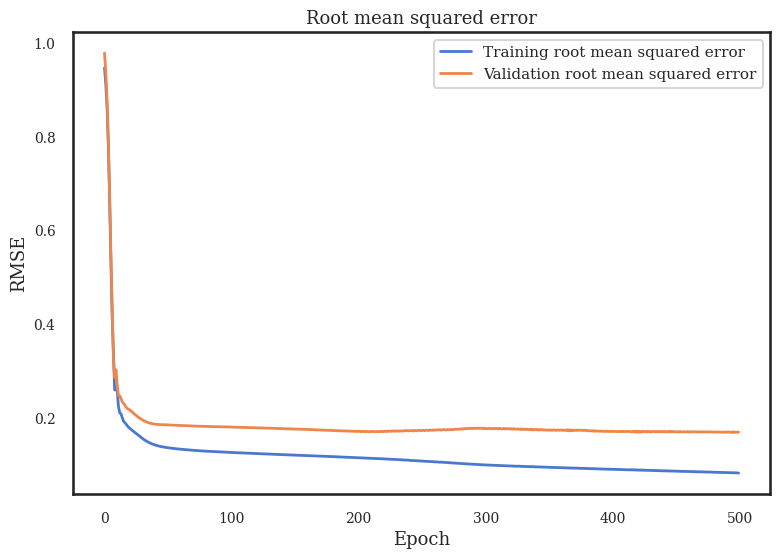

In [73]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'GRU_train_val_rmse.png'))
plt.show() 

In [74]:
# 200 epochs to be taken into consideration

### conv1D-LSTM

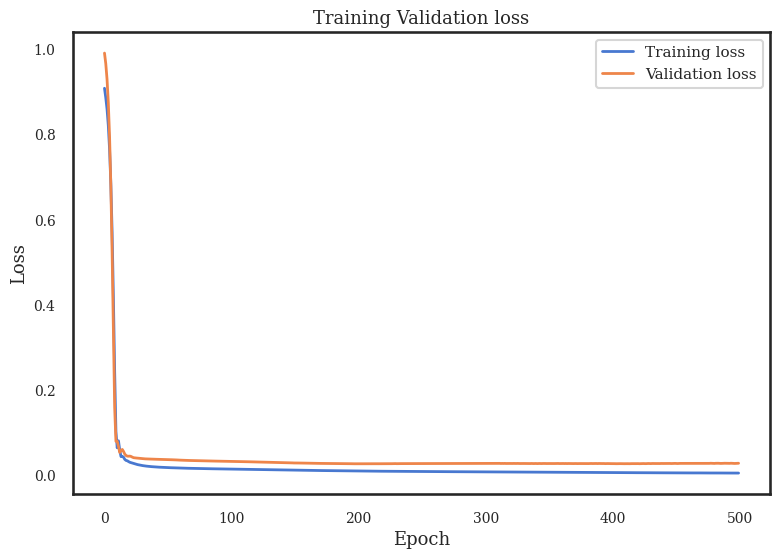

In [75]:
data = pd.read_csv('results_epochs_selection/Gogounou/conv1D_lstm_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'conv1D_lstm_train_val_loss.png'))
plt.show() 

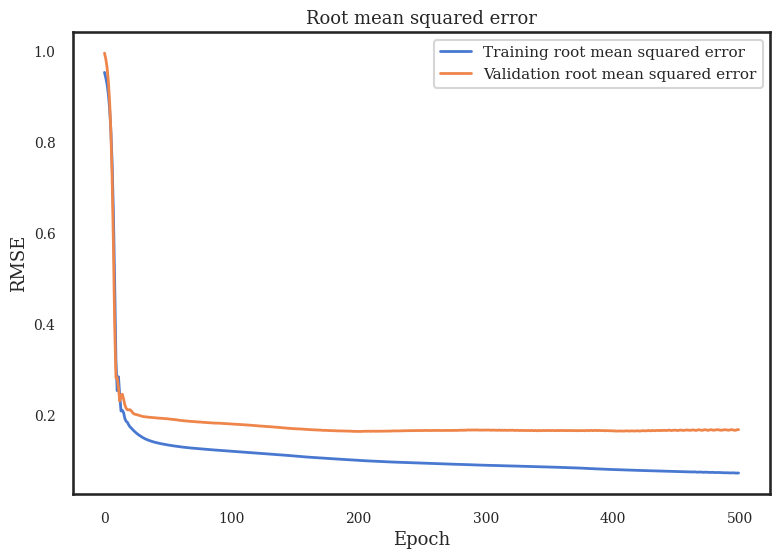

In [76]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Gogounou/', 'conv1D_lstm_train_val_rmse.png'))
plt.show() 

In [77]:
# 200 epochs to be taken into consideration

## Banikoara

### conv1D

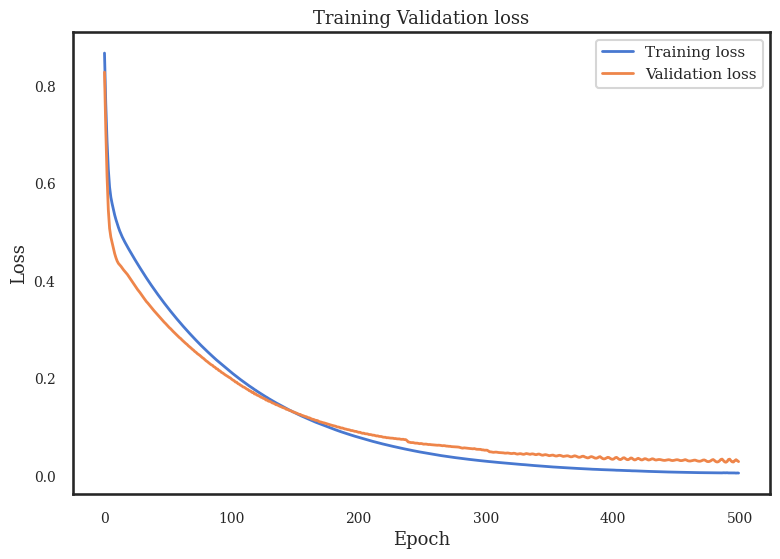

In [78]:
data = pd.read_csv('results_epochs_selection/Banikoara/conv1D_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'conv1D_train_val_loss.png'))
plt.show() 

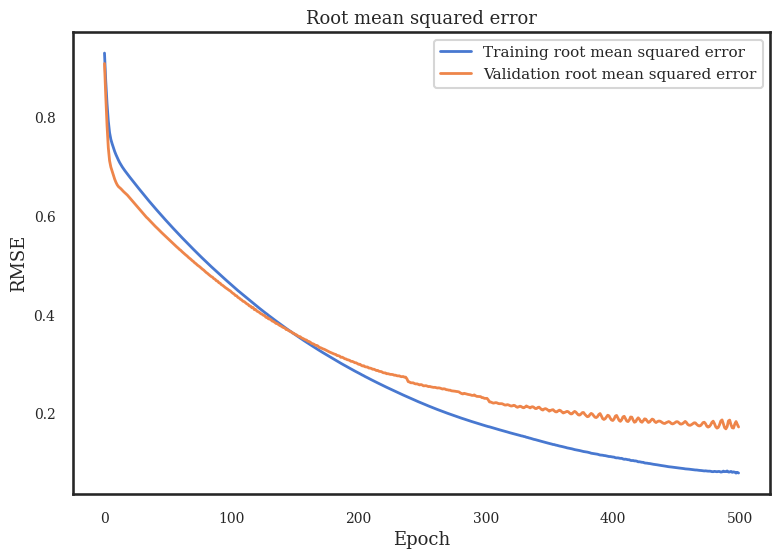

In [79]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'conv1D_train_val_rmse.png'))
plt.show() 

In [27]:
# 200 epochs to be taken into consideration

### LSTM

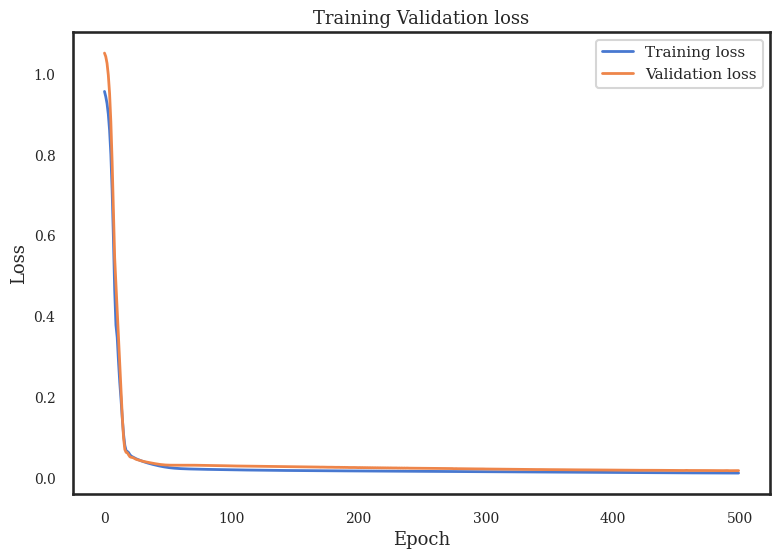

In [81]:
data = pd.read_csv('results_epochs_selection/Banikoara/LSTM_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'LSTM_train_val_loss.png'))
plt.show() 

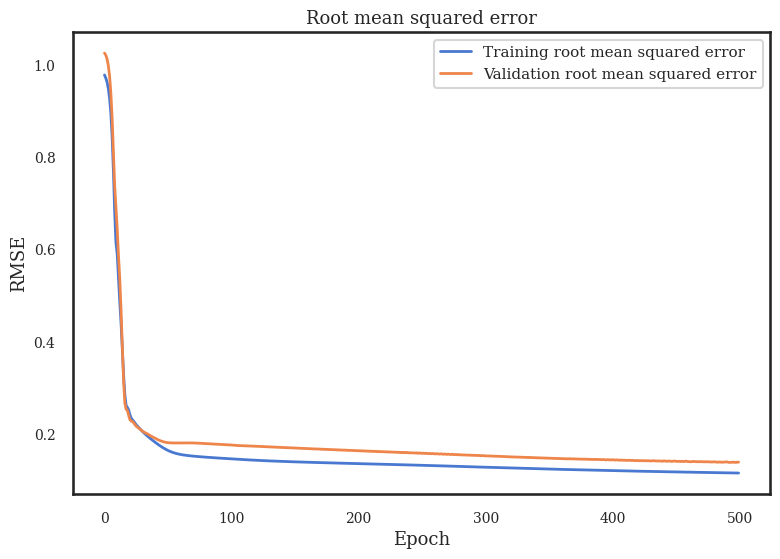

In [82]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'LSTM_train_val_rmse.png'))
plt.show() 

In [83]:
# 200 epochs to be taken into consideration

### GRU

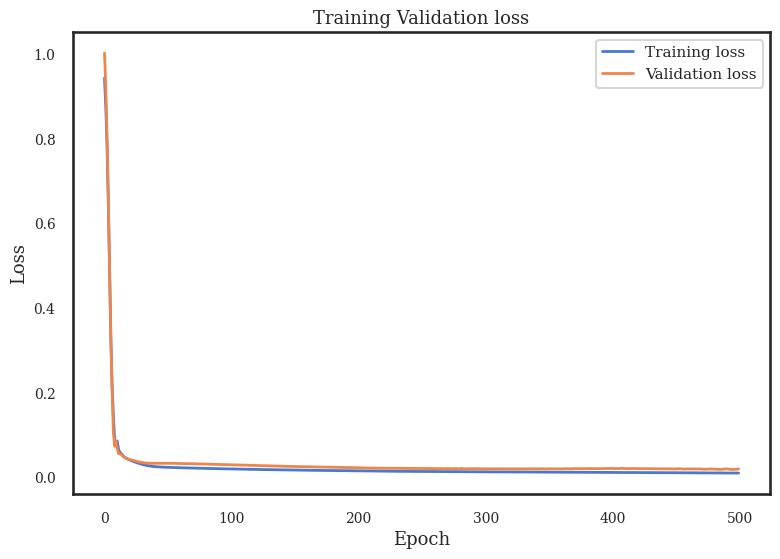

In [84]:
data = pd.read_csv('results_epochs_selection/Banikoara/GRU_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'GRU_train_val_loss.png'))
plt.show() 

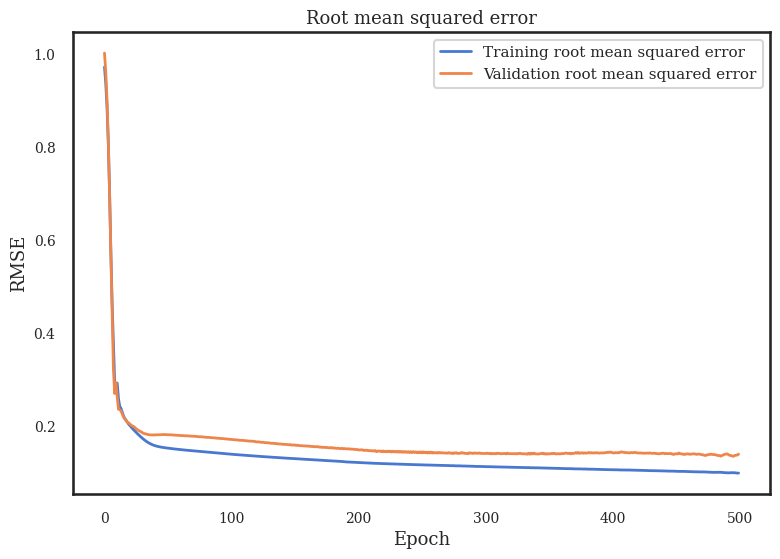

In [85]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'GRU_train_val_rmse.png'))
plt.show() 

In [86]:
# 200 epochs to be taken into consideration

### conv1D-LSTM

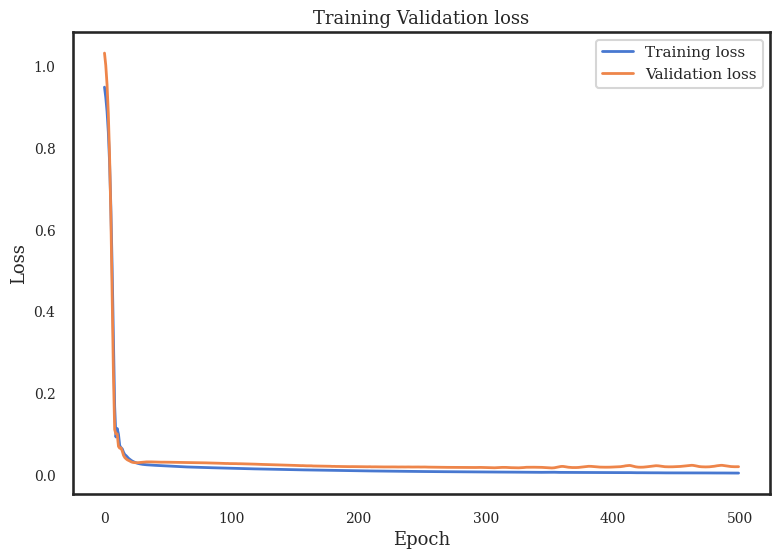

In [87]:
data = pd.read_csv('results_epochs_selection/Banikoara/conv1D_lstm_train_output.csv')
plot_loss(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'conv1D_lstm_train_val_loss.png'))
plt.show() 

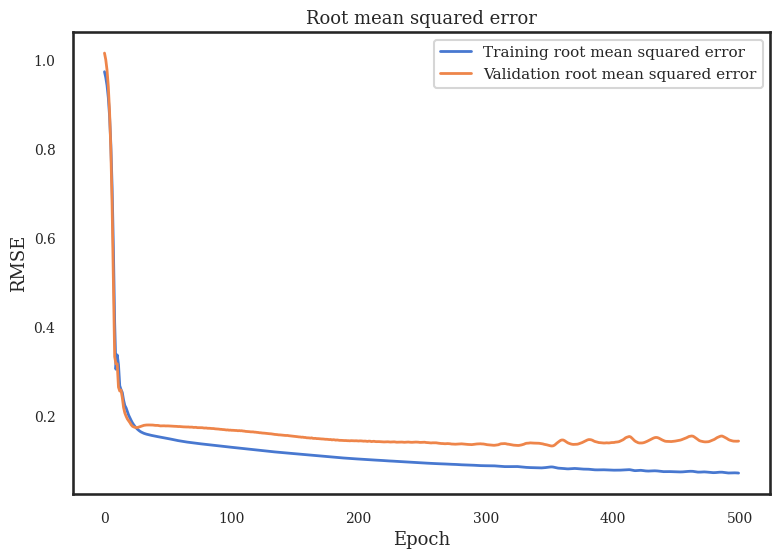

In [88]:
plot_metric(data[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Banikoara/', 'conv1D_lstm_train_val_rmse.png'))
plt.show() 

In [89]:
# 200 epochs to be taken into consideration

## Segbana

In [53]:
EPOCHS = 500

### conv1D

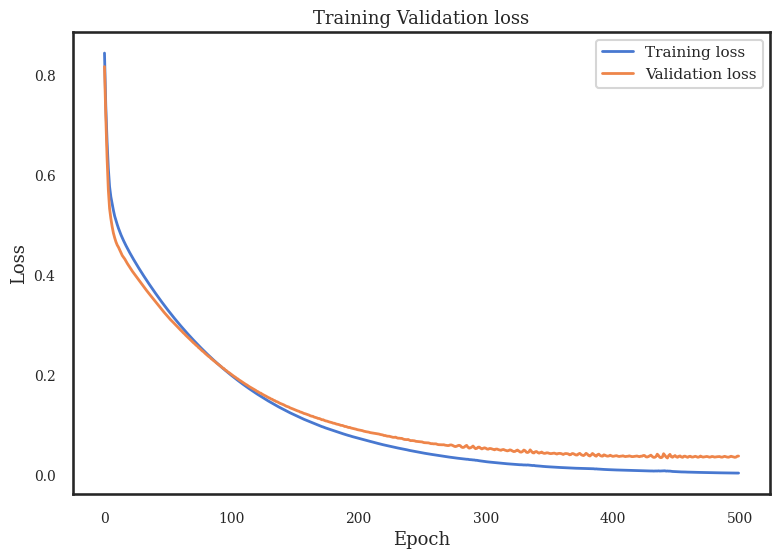

In [54]:
model_output = pd.read_csv('results_epochs_selection/Segbana/conv1D_train_output.csv')

plot_loss(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'conv1D_train_val_loss.png'))
plt.show() 

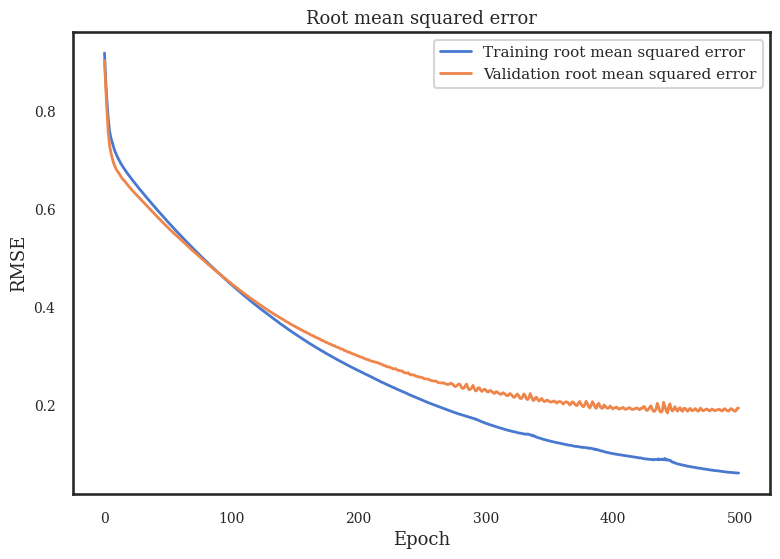

In [55]:
plot_metric(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'conv1D_train_val_rmse.png'))
plt.show() 

In [56]:
# 200 epochs to be taken into consideration

### LSTM

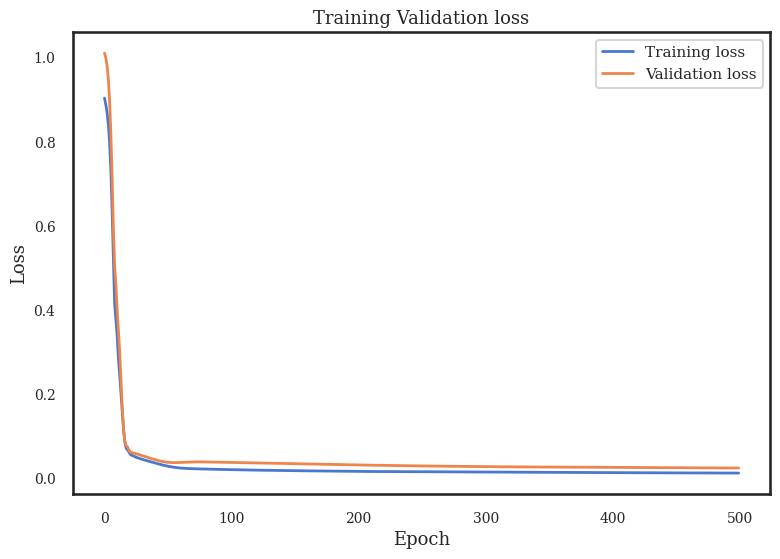

In [57]:
model_output = pd.read_csv('results_epochs_selection/Segbana/LSTM_train_output.csv')

plot_loss(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'LSTM_train_val_loss.png'))
plt.show() 

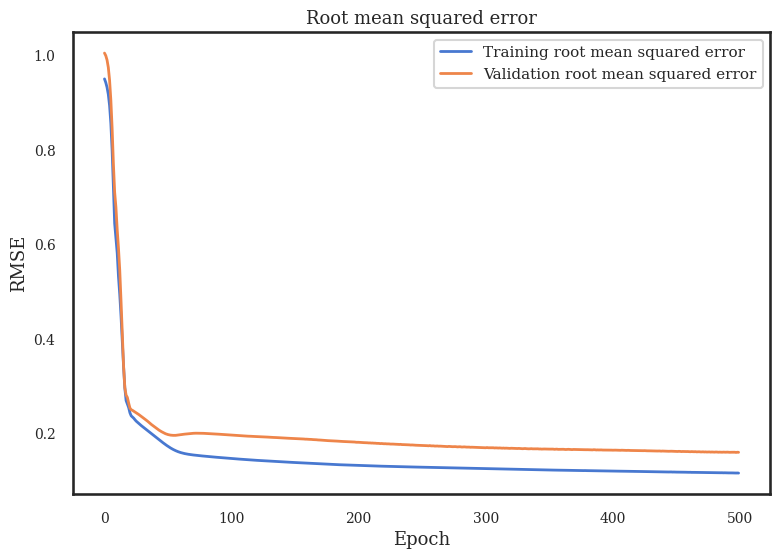

In [58]:
plot_metric(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'LSTM_train_val_rmse.png'))
plt.show() 

In [59]:
# 500 epochs to be taken into consideration

### GRU

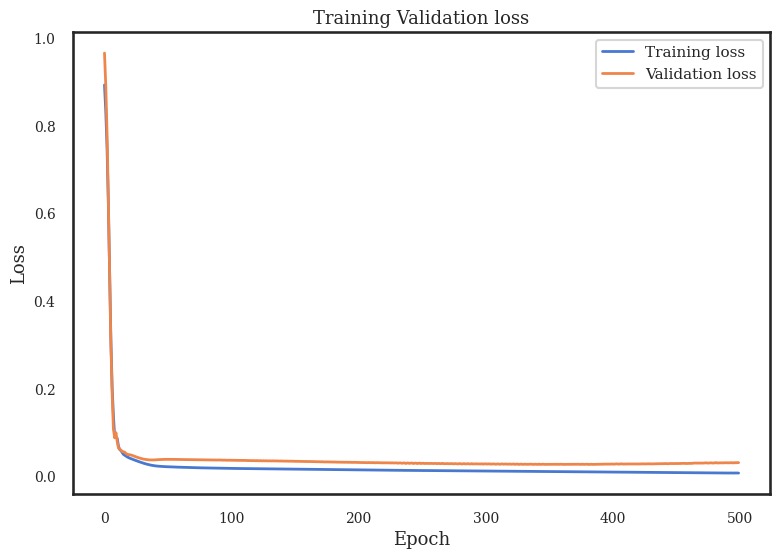

In [60]:
model_output = pd.read_csv('results_epochs_selection/Segbana/GRU_train_output.csv')

plot_loss(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'GRU_train_val_loss.png'))
plt.show() 

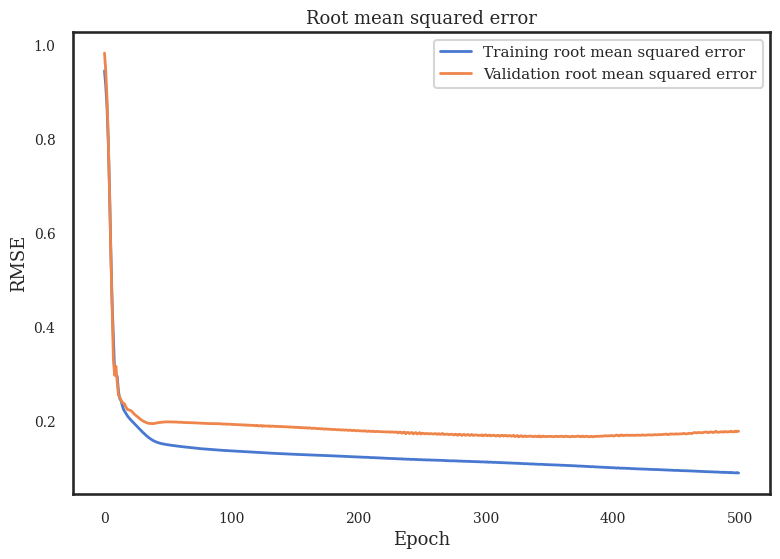

In [61]:
plot_metric(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'GRU_train_val_rmse.png'))
plt.show() 

In [62]:
# 400 epochs to be taken into consideration

### conv1D-LSTM

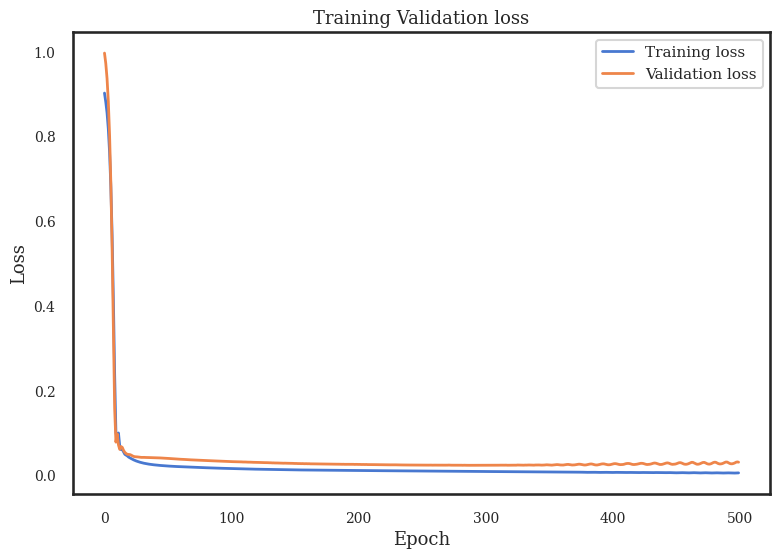

In [63]:
model_output = pd.read_csv('results_epochs_selection/Segbana/conv1D_lstm_train_output.csv')

plot_loss(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'conv1D_lstm_train_val_loss.png'))
plt.show() 

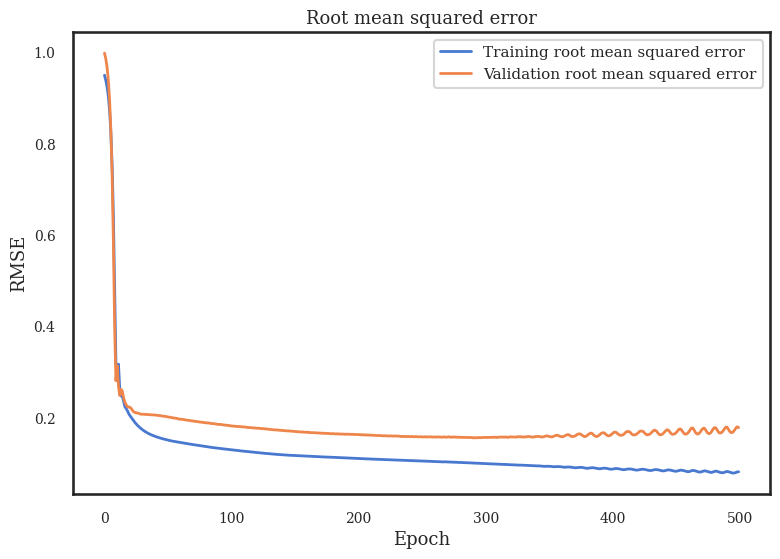

In [64]:
plot_metric(model_output[:EPOCHS])
plt.savefig(os.path.join('results_epochs_selection/Segbana/', 'conv1D_lstm_train_val_rmse.png'))
plt.show() 

In [48]:
# 300 epochs to be taken into consideration